In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import fm2p
import imgtools
from tqdm import tqdm

Loading DLC 2.3.7...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


c:\Users\dmartins\anaconda3\envs\fm1\lib\site-packages\oasis\functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [3]:
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.size'] = 7

In [5]:
img = imgtools.load_tif_stack(
    r'T:\axonal_imaging_LP\250319_DMM_DMM045_LPaxons\3x-003\3x-003_registered.tif',
    doReg=False,
    doNorm=False
)

In [25]:
plot_stack = []
for f in range(np.size(img,0)):
    fig = plt.figure(dpi=300, figsize=(4,4))
    plt.imshow(img[f,:,:], cmap='gray', vmin=0, vmax=4000)
    plt.axis('off')
    plt.tight_layout()
    plot_stack.append(imgtools.fmt_figure(fig))
plot_stack = np.array(plot_stack)

In [26]:
imgtools.write_animation(
    plot_stack,
    r'T:\axonal_imaging_LP\250319_DMM_DMM045_LPaxons\3x-003\demo_vid.mp4',
    20
)

Writing MP4 file.


100%|██████████| 2424/2424 [00:34<00:00, 71.10it/s]

Video written to T:\axonal_imaging_LP\250319_DMM_DMM045_LPaxons\3x-003\demo_vid.mp4


In [4]:
img = imgtools.load_tif_stack(
    r'K:\Mini2P\250402_DMM_DMM042_pillar\file_00003.tif',
    doReg=False,
    doNorm=False
)

In [5]:
img.shape

(8119, 512, 512)

In [6]:
img1 = img[0:1000,:,:]

In [7]:
N = 5

# Make a smoothing kernel.
kernel = np.ones(N) / N

# Convolve the kernel along the first (time) axis.
out = np.apply_along_axis(np.convolve, axis=0, arr=img1, v=kernel, mode='same')

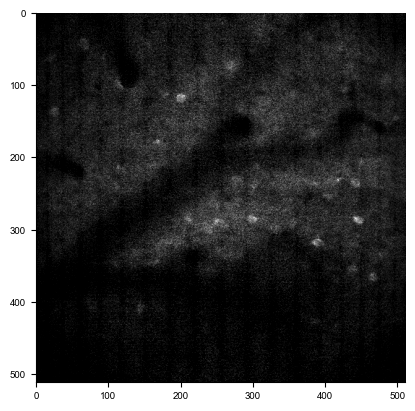

In [10]:
plt.imshow(out[5], vmin=0, vmax=700, cmap='gray')

In [11]:
plot_stack = []
for f in tqdm(range(np.size(out,0))):
    fig = plt.figure(dpi=300, figsize=(4,4))
    plt.imshow(out[f,:,:], cmap='gray', vmin=0, vmax=700)
    plt.axis('off')
    plt.tight_layout()
    plot_stack.append(imgtools.fmt_figure(fig))
plot_stack = np.array(plot_stack)

imgtools.write_animation(
    plot_stack,
    r'K:\Mini2P\250402_DMM_DMM042_pillar\fm3_twop_demo_vid_v0.mp4',
    30
)

100%|██████████| 1000/1000 [01:30<00:00, 11.10it/s]


Writing MP4 file.


100%|██████████| 1000/1000 [00:09<00:00, 103.02it/s]

Video written to K:\Mini2P\250402_DMM_DMM042_pillar\fm3_twop_demo_vid_v0.mp4


In [12]:
data = fm2p.read_h5(r'K:\Mini2P\250306_DMM_DMM038_pillar\fm2\250306_DMM_DMM038_fm_2_preproc.h5')

In [66]:
[x for x in list(data.keys()) if 'pillar' in x]

['pillar_centroid', 'pillar_radius', 'pillar_x', 'pillar_y']

In [21]:
def norm(x):
    norm_x = x.copy()
    norm_x = norm_x - np.nanmin(norm_x)
    norm_x = norm_x / np.nanmax(norm_x)
    return norm_x
twopT = data['twopT']
raw_dFF = data['raw_dFF']
eyeT_startInd = data['eyeT_startInd']
eyeT_endInd = data['eyeT_endInd']
eyeT = data['eyeT'][eyeT_startInd:eyeT_endInd]
theta_raw = data['theta'][eyeT_startInd:eyeT_endInd]
phi_raw = data['phi'][eyeT_startInd:eyeT_endInd]
puprad_raw = data['longaxis'][eyeT_startInd:eyeT_endInd]

pxls2cm = data['pxls2cm']
speed = data['speed']
# Animal yaw is defined so that 0 deg is rightward in the raw video, 90 deg is downward in the raw
# video, and angles wrap from 0 to 360 deg clockwise.
yaw = data['head_yaw_deg']
movement_yaw = data['movement_yaw_deg']
top_x = data['x']
top_y = data['y']
top_xdisp = data['x_displacement']
top_ydisp = data['y_displacement']
learx = data['lear_x']
leary = data['lear_y']
rearx = data['rear_x']
reary = data['rear_y']

eyeT = eyeT.copy() - eyeT[0]

theta = fm2p.interpT(theta_raw, eyeT, twopT, fill_consecutive=True)
phi = fm2p.interpT(phi_raw, eyeT, twopT, fill_consecutive=True)
puprad = fm2p.interpT(puprad_raw, eyeT, twopT, fill_consecutive=True)

In [85]:
topframe = fm2p.load_video_frame(r'K:\Mini2P\250402_DMM_DMM042_pillar\fm3_250402_122954_634\fm3_0001.mp4', fr=500)

Reading frame 500 from fm3_0001.mp4


In [86]:
topframe.shape

(2048, 2448)

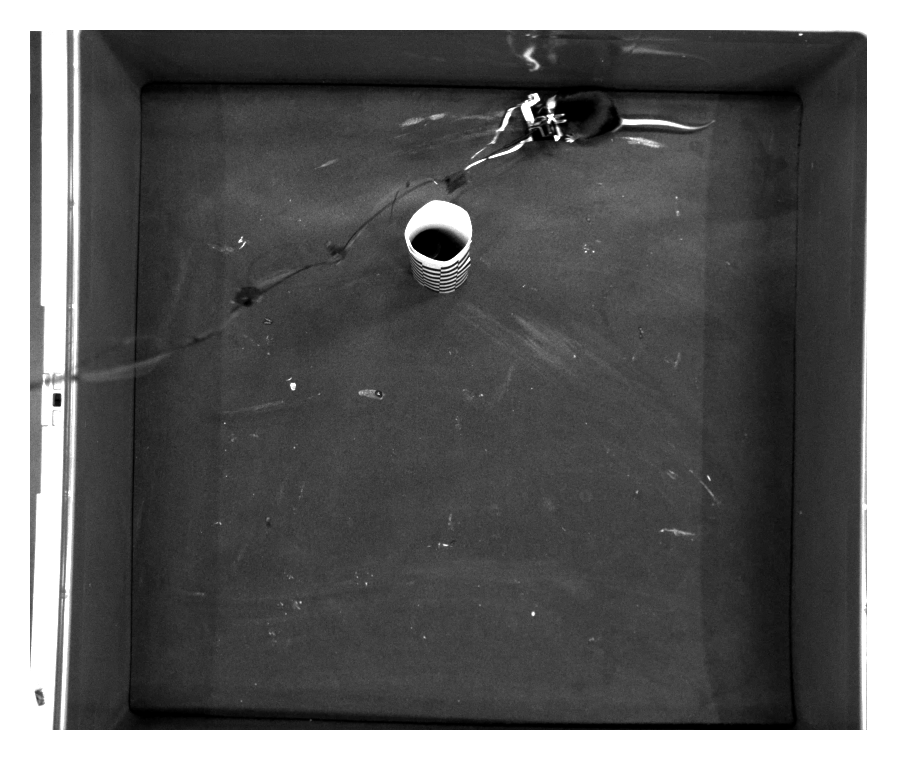

In [90]:
pillarx = data['pillar_centroid']['x']
pillary = data['pillar_centroid']['y']

fig, ax_top = plt.subplots(1,1,dpi=300,figsize=(3,3))
scale = 0.5
ax_top.imshow(topframe, cmap='gray', vmin=0, vmax=150)
# ax_top.plot(rearx[f]*scale, reary[f]*scale, '.', color='tab:purple')
# ax_top.plot(learx[f]*scale, leary[f]*scale, '.', color='tab:purple')
ax_top.axis('off')
# ax_top.plot(830, 515, '*', color='tab:red')
# headx, heady = np.mean([rearx[f]*scale, learx[f]*scale]), np.mean([reary[f]*scale, leary[f]*scale])
# ax_top.plot([headx, headx+250*np.cos(np.deg2rad(yaw[f]))],
#             [heady, heady+250*np.sin(np.deg2rad(yaw[f]))],
#             '-', lw=2, color='tab:orange')
# ax_top.plot([headx, pillarx], [heady, pillary], '-', lw=2, color='tab:red')
# ax_top.set_xlim([0,1224*2])
# ax_top.set_ylim([1024*2,0])
fig.tight_layout()
fig.savefig('topdown_demo.svg')

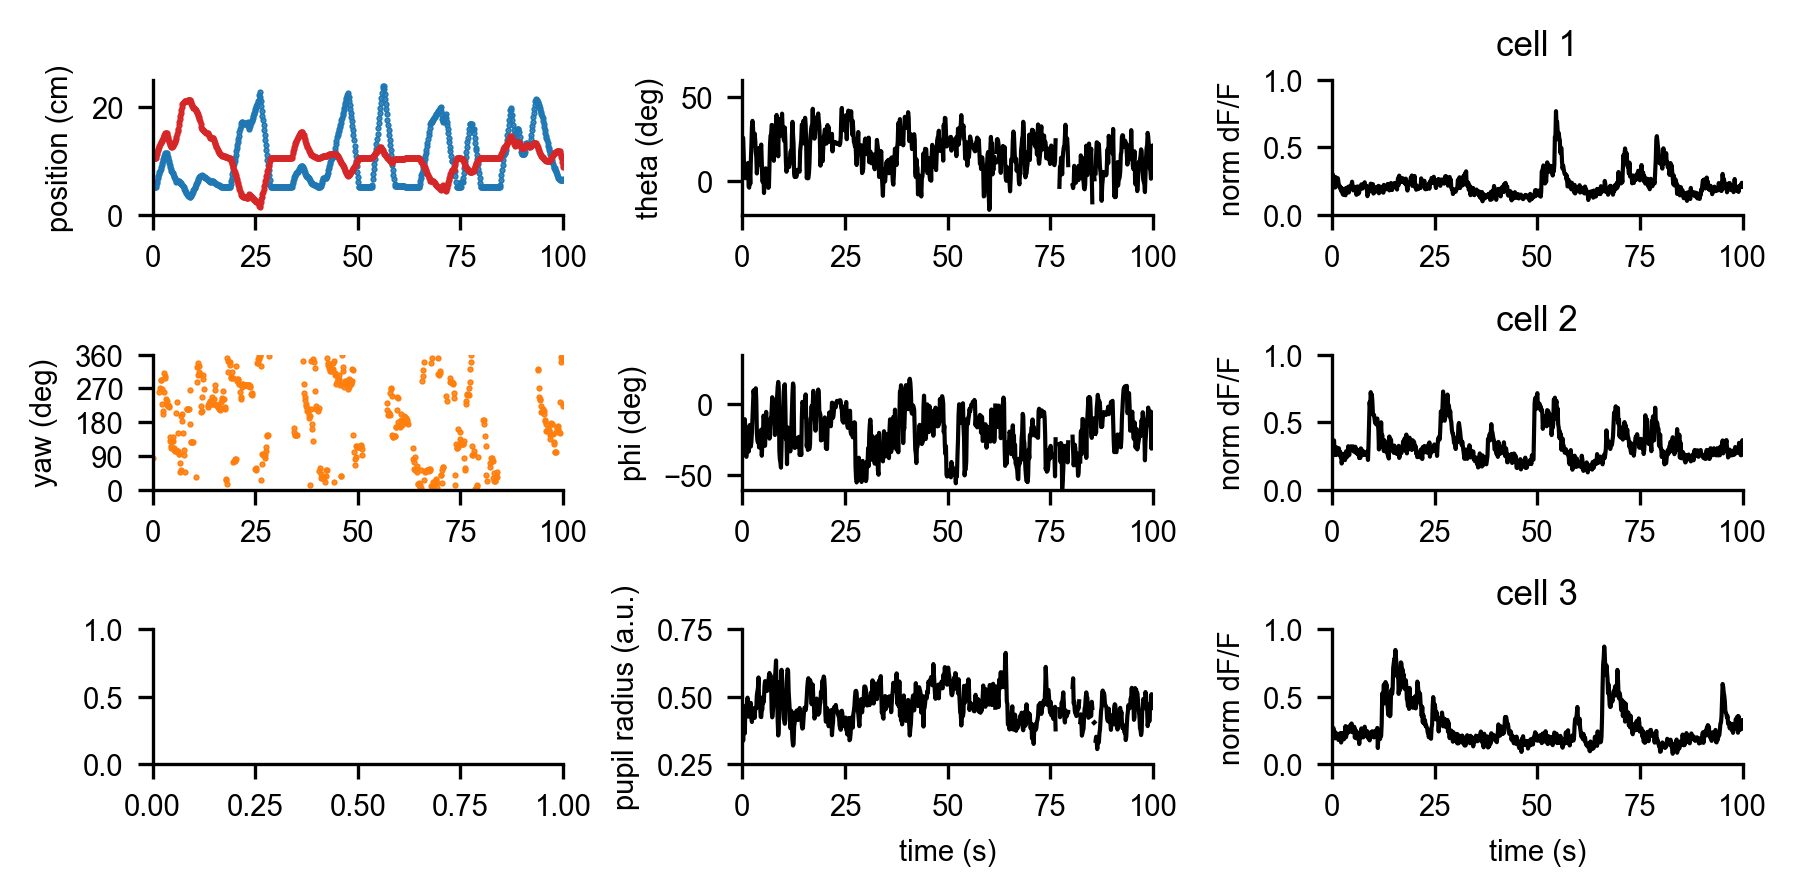

In [64]:
startT = 1950
endT = 2050

fig, axs = plt.subplots(3,3, figsize=(6,3), dpi=300)

[[ax_xy,ax_theta,ax_c1],[ax_yaw,ax_phi,ax_c2],[ax_ego,ax_puprad,ax_c3]]= axs

ax_xy.plot(twopT, top_x/pxls2cm, '.', color='tab:blue', ms=1, label='x')
ax_xy.plot(twopT, top_y/pxls2cm, '.', color='tab:red', ms=1, label='y')
ax_xy.set_xlim([startT,endT])
ax_xy.set_ylim([0,25])
# ax_xy.legend(fontsize=6)
ax_xy.vlines(twopT[f], 0, 60, ls='--', color='gray', lw=1)
ax_xy.set_ylabel('position (cm)')
ax_xy.set_xticks(np.arange(startT,endT+25,25), labels=np.arange(0,125,25))

ax_yaw.plot(twopT, yaw, '.', color='tab:orange', ms=1)
ax_yaw.set_xlim([startT,endT])
ax_yaw.set_ylabel('yaw (deg)')
ax_yaw.set_yticks([0,90,180,270,360])
ax_yaw.set_ylim([0,360])
ax_yaw.vlines(twopT[f], 0, 360, ls='--', color='gray', lw=1)
ax_yaw.set_xticks(np.arange(startT,endT+25,25), labels=np.arange(0,125,25))

# ax_ego.plot(twopT, ego, '.', color='tab:red', ms=1)
# ax_ego.set_xlim([320,420])
# ax_ego.set_ylabel('egocentric (deg)')
# ax_ego.set_yticks([-180, -90, 0, 90, 180])
# ax_ego.set_ylim([-180,180])
# ax_ego.vlines(twopT[f], -180, 180, ls='--', color='gray', lw=1)
# ax_ego.set_xticks(np.arange(320,445,25), labels=np.arange(0,125,25))
# ax_ego.set_xlabel('time (s)')

ax_theta.plot(twopT, np.rad2deg(theta), 'k-', lw=1)
ax_theta.set_xlim([startT,endT])
ax_theta.set_ylabel('theta (deg)')
ax_theta.set_ylim([-20, 60])
ax_theta.vlines(twopT[f], -15, 40, ls='--', color='gray', lw=1)
ax_theta.set_xticks(np.arange(startT,endT+25,25), labels=np.arange(0,125,25))

ax_phi.plot(twopT, np.rad2deg(phi), 'k-', lw=1)
ax_phi.vlines(twopT[f], -60, 40, ls='--', color='gray', lw=1)
ax_phi.set_xlim([startT,endT])
ax_phi.set_ylim([-60, 35])
ax_phi.set_ylabel('phi (deg)')
ax_phi.set_xticks(np.arange(startT,endT+25,25), labels=np.arange(0,125,25))

ax_puprad.plot(twopT, norm(puprad), 'k-', lw=1)
ax_puprad.set_xlabel('time (s)')
ax_puprad.set_xticks(np.arange(startT,endT+25,25), labels=np.arange(0,125,25))
ax_puprad.set_xlim([startT,endT])
ax_puprad.set_ylabel('pupil radius (a.u.)')
ax_puprad.set_ylim([0.25, .75])
ax_puprad.vlines(twopT[f], 0, 1, ls='--', color='gray', lw=1)

ax_c1.plot(twopT, norm(raw_dFF[0,:]), 'k', lw=1)
ax_c1.set_xlim([startT,endT])
ax_c1.set_title('cell 1')
ax_c1.set_ylim([0,1])
ax_c1.set_ylabel('norm dF/F')
ax_c1.set_xticks(np.arange(startT,endT+25,25), labels=np.arange(0,125,25))
ax_c1.vlines(twopT[f], 0, 1, ls='--', color='gray', lw=1)

ax_c2.plot(twopT, norm(raw_dFF[12,:]), 'k', lw=1)
ax_c2.set_xlim([startT,endT])
ax_c2.set_title('cell 2')
ax_c2.set_ylim([0,1])
ax_c2.set_ylabel('norm dF/F')
ax_c2.set_xticks(np.arange(startT,endT+25,25), labels=np.arange(0,125,25))
ax_c2.vlines(twopT[f], 0, 1, ls='--', color='gray', lw=1)

ax_c3.plot(twopT, norm(raw_dFF[4,:]), 'k', lw=1)
ax_c3.set_xlim([startT,endT])
ax_c3.set_title('cell 3')
ax_c3.set_ylim([0,1])
ax_c3.set_ylabel('norm dF/F')
ax_c3.set_xticks(np.arange(startT,endT+25,25), labels=np.arange(0,125,25))
ax_c3.set_xlabel('time (s)')
ax_c3.vlines(twopT[f], 0, 1, ls='--', color='gray', lw=1)

fig.tight_layout()
fig.savefig('DMM038_demo.svg')